# Subject: Final Assignment - Clustering
# Author: Nguyen Hoai Phuong
# Class: MSE09

## 1- Import important packages

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

In [51]:
def print_clusters(n_clusters, y_predict, documents):
    for cluster in range(n_clusters):
        result = np.where(y_predict == cluster)
        print('Cluster %d' %(cluster+1))
        for idx in result[0]:
            print('No ' + str(idx+1) + ' : ' + documents[idx])
        print('----------------------------')

## 2- Dataset

![problem2.png](images/problem2.png)

In [32]:
dataset_dict = {
    'No': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Content': [
        'AABAAABBBAACD',
        'ACDAAABBBCCCD',
        'CCDDDCDDDDDCCC',
        'ABCDEABCDEABCDE',
        'ABCCCCCCCCCCBC',
        'DEADEADDDDDE',
        'BEBBBBEEECBBBC',
        'ABCAAAABBBBBB',
        'AEECDDDDDD',
        'ABCBDDDDDD'
    ]
}
dataset = pd.DataFrame(dataset_dict)
dataset

,No,Content
0,1,AABAAABBBAACD
1,2,ACDAAABBBCCCD
2,3,CCDDDCDDDDDCCC
3,4,ABCDEABCDEABCDE
4,5,ABCCCCCCCCCCBC
5,6,DEADEADDDDDE
6,7,BEBBBBEEECBBBC
7,8,ABCAAAABBBBBB
8,9,AEECDDDDDD
9,10,ABCBDDDDDD


## 3- Vectorize dataset

In [33]:
vectorizer = TfidfVectorizer(analyzer="char")
X = vectorizer.fit_transform(dataset["Content"]).toarray()
vocab = vectorizer.get_feature_names()

In [34]:
vocab

['a', 'b', 'c', 'd', 'e']

In [35]:
X

array([[0.83468824, 0.52375385, 0.1087776 , 0.13093846, 0.        ],
       [0.59634574, 0.49113442, 0.54401558, 0.32742295, 0.        ],
       [0.        , 0.        , 0.52881756, 0.84873552, 0.        ],
       [0.3933659 , 0.43195419, 0.3588475 , 0.43195419, 0.58593763],
       [0.09689159, 0.21279287, 0.97228145, 0.        , 0.        ],
       [0.21945727, 0.        , 0.        , 0.84344932, 0.4903384 ],
       [0.        , 0.81564207, 0.1693994 , 0.        , 0.55320146],
       [0.54259014, 0.83414378, 0.09899542, 0.        , 0.        ],
       [0.13593597, 0.        , 0.1240074 , 0.89562588, 0.40496648],
       [0.14132961, 0.31038743, 0.12892774, 0.9311623 , 0.        ]])

## 4- Sử dụng k-means

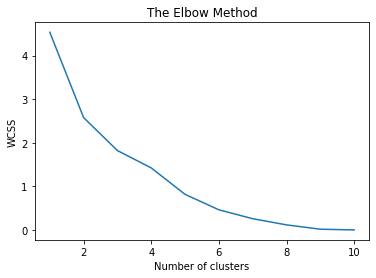

In [82]:
wcss = []
num = 10
for i in range(1,num+1): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 1, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,num+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Từ đồ thị trên, chúng ta có thể thấy `n_clusters = 5` hoặc `n_clusters = 6` là lựa chọn tốt nhất.

### 4.1 - Số lượng cluster bằng 5

In [37]:
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 0, 2, 3, 4, 2, 1, 4, 0], dtype=int32)

In [38]:
print("clusters center:")
kmeans.cluster_centers_

clusters center:


array([[0.0706648 , 0.15519372, 0.32887265, 0.88994891, 0.        ],
       [0.65787471, 0.61634402, 0.2505962 , 0.15278714, 0.        ],
       [0.19668295, 0.62379813, 0.26412345, 0.21597709, 0.56956954],
       [0.09689159, 0.21279287, 0.97228145, 0.        , 0.        ],
       [0.17769662, 0.        , 0.0620037 , 0.8695376 , 0.44765244]])

In [39]:
print("silhouette_score :", silhouette_score(X, y_kmeans))

silhouette_score : 0.29770943824670415


In [40]:
print_clusters(n_clusters, y_kmeans, dataset['Content'])

Cluster 1
No 3 : CCDDDCDDDDDCCC
No 10 : ABCBDDDDDD
----------------------------
Cluster 2
No 1 : AABAAABBBAACD
No 2 : ACDAAABBBCCCD
No 8 : ABCAAAABBBBBB
----------------------------
Cluster 3
No 4 : ABCDEABCDEABCDE
No 7 : BEBBBBEEECBBBC
----------------------------
Cluster 4
No 5 : ABCCCCCCCCCCBC
----------------------------
Cluster 5
No 6 : DEADEADDDDDE
No 9 : AEECDDDDDD
----------------------------


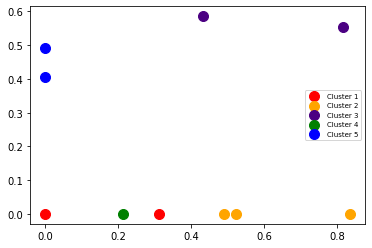

In [41]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')  
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 4], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 4], s = 100, c = 'indigo', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 4], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 4], s = 100, c = 'blue', label = 'Cluster 5')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=7)
plt.show()

### 4.2 - Số lượng cluster bằng 6

In [42]:
n_clusters = 6
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 3, 5, 2, 0, 4, 1, 0, 3], dtype=int32)

In [43]:
print("clusters center:")
kmeans.cluster_centers_

clusters center:


array([[0.17769662, 0.        , 0.0620037 , 0.8695376 , 0.44765244],
       [0.65787471, 0.61634402, 0.2505962 , 0.15278714, 0.        ],
       [0.09689159, 0.21279287, 0.97228145, 0.        , 0.        ],
       [0.0706648 , 0.15519372, 0.32887265, 0.88994891, 0.        ],
       [0.        , 0.81564207, 0.1693994 , 0.        , 0.55320146],
       [0.3933659 , 0.43195419, 0.3588475 , 0.43195419, 0.58593763]])

In [44]:
print("silhouette_score :", silhouette_score(X, y_kmeans))

silhouette_score : 0.24713976988796443


In [45]:
print_clusters(n_clusters, y_kmeans, dataset['Content'])

Cluster 1
No 6 : DEADEADDDDDE
No 9 : AEECDDDDDD
----------------------------
Cluster 2
No 1 : AABAAABBBAACD
No 2 : ACDAAABBBCCCD
No 8 : ABCAAAABBBBBB
----------------------------
Cluster 3
No 5 : ABCCCCCCCCCCBC
----------------------------
Cluster 4
No 3 : CCDDDCDDDDDCCC
No 10 : ABCBDDDDDD
----------------------------
Cluster 5
No 7 : BEBBBBEEECBBBC
----------------------------
Cluster 6
No 4 : ABCDEABCDEABCDE
----------------------------


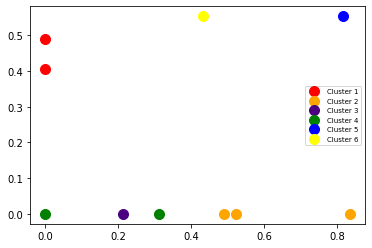

In [46]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')  
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 4], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 4], s = 100, c = 'indigo', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 4], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 4], s = 100, c = 'blue', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 1], X[y_kmeans == 5, 4], s = 100, c = 'yellow', label = 'Cluster 6')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=7)
plt.show()

## 5 - Sử dụng HAC

### 5.1 - Single link merging method

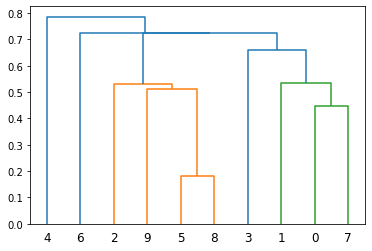

In [63]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.show()

In [ ]:
Từ biểu đồ dendrogram trên, chúng ta có thể nhận ra khoảng cách từ cụm (5, 8) (hay document No 6, 9) đến cụm 9 (document No 10) là lớn nhất. Vì vậy, số lượng cluster tối ưu sẽ là 9.

In [83]:
n_clusters = 9
hac = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
y_hac = hac.fit_predict(X)
y_hac

array([8, 7, 6, 4, 3, 0, 5, 1, 0, 2])

In [84]:
print("silhouette_score :", silhouette_score(X, y_hac))

silhouette_score : 0.13514177939197886


In [85]:
print_clusters(n_clusters, y_hac, dataset['Content'])

Cluster 1
No 6 : DEADEADDDDDE
No 9 : AEECDDDDDD
----------------------------
Cluster 2
No 8 : ABCAAAABBBBBB
----------------------------
Cluster 3
No 10 : ABCBDDDDDD
----------------------------
Cluster 4
No 5 : ABCCCCCCCCCCBC
----------------------------
Cluster 5
No 4 : ABCDEABCDEABCDE
----------------------------
Cluster 6
No 7 : BEBBBBEEECBBBC
----------------------------
Cluster 7
No 3 : CCDDDCDDDDDCCC
----------------------------
Cluster 8
No 2 : ACDAAABBBCCCD
----------------------------
Cluster 9
No 1 : AABAAABBBAACD
----------------------------


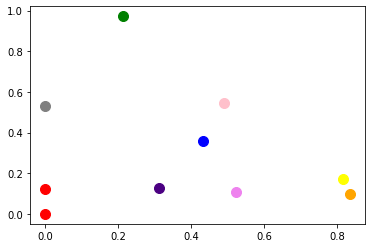

In [86]:
plt.scatter(X[y_hac == 0, 1], X[y_hac == 0, 2], s = 100, c = 'red', label = 'Cluster 1')  
plt.scatter(X[y_hac == 1, 1], X[y_hac == 1, 2], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_hac == 2, 1], X[y_hac == 2, 2], s = 100, c = 'indigo', label = 'Cluster 3')
plt.scatter(X[y_hac == 3, 1], X[y_hac == 3, 2], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_hac == 4, 1], X[y_hac == 4, 2], s = 100, c = 'blue', label = 'Cluster 5')
plt.scatter(X[y_hac == 5, 1], X[y_hac == 5, 2], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(X[y_hac == 6, 1], X[y_hac == 6, 2], s = 100, c = 'gray', label = 'Cluster 7')
plt.scatter(X[y_hac == 7, 1], X[y_hac == 7, 2], s = 100, c = 'pink', label = 'Cluster 8')
plt.scatter(X[y_hac == 8, 1], X[y_hac == 8, 2], s = 100, c = 'violet', label = 'Cluster 9')

### 5.2 - Complete link merging method

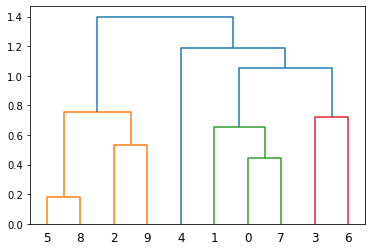

In [87]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.show()

Từ biểu đồ dendrogram trên, chúng ta có thể nhận ra khoảng cách từ cụm (5, 8, 2, 9) (hay document No 6, 9, 3, 10) đến cụm (1, 0, 7, 3, 6) (document No 2, 1, 8, 4, 7) là lớn nhất. Vì vậy, số lượng cluster tối ưu sẽ là 4.

In [89]:
n_clusters = 4
hac = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
y_hac = hac.fit_predict(X)
y_hac

array([3, 3, 0, 1, 2, 0, 1, 3, 0, 0])

In [90]:
print("silhouette_score :", silhouette_score(X, y_hac))

silhouette_score : 0.3250339344884349


In [91]:
print_clusters(n_clusters, y_hac, dataset['Content'])

Cluster 1
No 3 : CCDDDCDDDDDCCC
No 6 : DEADEADDDDDE
No 9 : AEECDDDDDD
No 10 : ABCBDDDDDD
----------------------------
Cluster 2
No 4 : ABCDEABCDEABCDE
No 7 : BEBBBBEEECBBBC
----------------------------
Cluster 3
No 5 : ABCCCCCCCCCCBC
----------------------------
Cluster 4
No 1 : AABAAABBBAACD
No 2 : ACDAAABBBCCCD
No 8 : ABCAAAABBBBBB
----------------------------


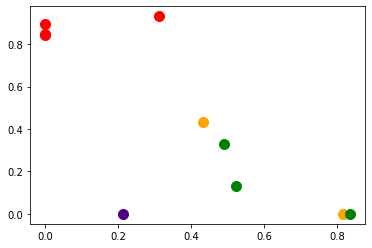

In [93]:
plt.scatter(X[y_hac == 0, 1], X[y_hac == 0, 3], s = 100, c = 'red', label = 'Cluster 1')  
plt.scatter(X[y_hac == 1, 1], X[y_hac == 1, 3], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_hac == 2, 1], X[y_hac == 2, 3], s = 100, c = 'indigo', label = 'Cluster 3')
plt.scatter(X[y_hac == 3, 1], X[y_hac == 3, 3], s = 100, c = 'green', label = 'Cluster 4')

### 5.3 - Average merging method

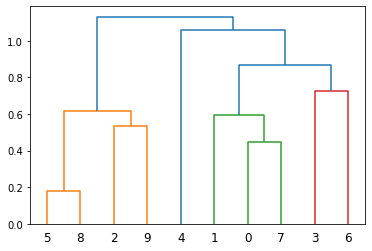

In [94]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.show()

Từ biểu đồ dendrogram trên, chúng ta có thể nhận ra khoảng cách từ cụm (5, 8) (hay document No 6, 9) đến cụm (0, 7) (document No 1, 8) là lớn nhất. Vì vậy, số lượng cluster tối ưu sẽ là 9.

In [99]:
n_clusters = 9
hac = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
y_hac = hac.fit_predict(X)
y_hac

array([8, 6, 7, 4, 5, 0, 3, 2, 0, 1])

In [100]:
print("silhouette_score :", silhouette_score(X, y_hac))

silhouette_score : 0.13514177939197886


In [101]:
print_clusters(n_clusters, y_hac, dataset['Content'])

Cluster 1
No 6 : DEADEADDDDDE
No 9 : AEECDDDDDD
----------------------------
Cluster 2
No 10 : ABCBDDDDDD
----------------------------
Cluster 3
No 8 : ABCAAAABBBBBB
----------------------------
Cluster 4
No 7 : BEBBBBEEECBBBC
----------------------------
Cluster 5
No 4 : ABCDEABCDEABCDE
----------------------------
Cluster 6
No 5 : ABCCCCCCCCCCBC
----------------------------
Cluster 7
No 2 : ACDAAABBBCCCD
----------------------------
Cluster 8
No 3 : CCDDDCDDDDDCCC
----------------------------
Cluster 9
No 1 : AABAAABBBAACD
----------------------------


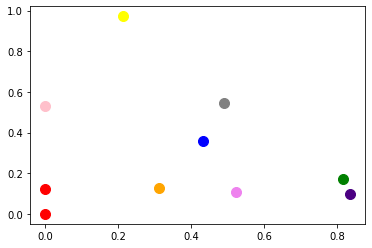

In [102]:
plt.scatter(X[y_hac == 0, 1], X[y_hac == 0, 2], s = 100, c = 'red', label = 'Cluster 1')  
plt.scatter(X[y_hac == 1, 1], X[y_hac == 1, 2], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_hac == 2, 1], X[y_hac == 2, 2], s = 100, c = 'indigo', label = 'Cluster 3')
plt.scatter(X[y_hac == 3, 1], X[y_hac == 3, 2], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_hac == 4, 1], X[y_hac == 4, 2], s = 100, c = 'blue', label = 'Cluster 5')
plt.scatter(X[y_hac == 5, 1], X[y_hac == 5, 2], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(X[y_hac == 6, 1], X[y_hac == 6, 2], s = 100, c = 'gray', label = 'Cluster 7')
plt.scatter(X[y_hac == 7, 1], X[y_hac == 7, 2], s = 100, c = 'pink', label = 'Cluster 8')
plt.scatter(X[y_hac == 8, 1], X[y_hac == 8, 2], s = 100, c = 'violet', label = 'Cluster 9')

### 5.4 - Ward merging method

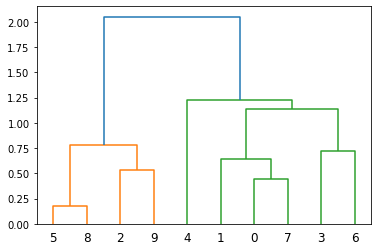

In [105]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

Từ biểu đồ dendrogram trên, chúng ta có thể nhận ra khoảng cách từ cụm (5, 8, 2, 9) (hay document No 6, 9, 3, 10) đến cụm (4, 1, 0, 7, 3, 6) (document No 5, 2, 1, 8, 4, 7) là lớn nhất. Vì vậy, số lượng cluster tối ưu sẽ là 2.

In [106]:
n_clusters = 2
hac = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
y_hac = hac.fit_predict(X)
y_hac

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [107]:
print("silhouette_score :", silhouette_score(X, y_hac))

silhouette_score : 0.3487772838410113


In [108]:
print_clusters(n_clusters, y_hac, dataset['Content'])

Cluster 1
No 1 : AABAAABBBAACD
No 2 : ACDAAABBBCCCD
No 4 : ABCDEABCDEABCDE
No 5 : ABCCCCCCCCCCBC
No 7 : BEBBBBEEECBBBC
No 8 : ABCAAAABBBBBB
----------------------------
Cluster 2
No 3 : CCDDDCDDDDDCCC
No 6 : DEADEADDDDDE
No 9 : AEECDDDDDD
No 10 : ABCBDDDDDD
----------------------------


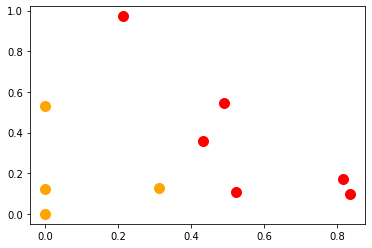

In [109]:
plt.scatter(X[y_hac == 0, 1], X[y_hac == 0, 2], s = 100, c = 'red', label = 'Cluster 1')  
plt.scatter(X[y_hac == 1, 1], X[y_hac == 1, 2], s = 100, c = 'orange', label = 'Cluster 2')